# Approximation lab

### Essential imports

In [16]:
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
from prettytable import PrettyTable

### Helper functions

In [22]:
def calc_sx(xs):
    res = 0
    for x in xs:
        res += x
    return res

def calc_sxx(xs):
    res = 0
    for x in xs:
        res += x**2
    return res

def calc_sxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i] * ys[i]
    return res

def calc_sxxy(xs, ys):
    res = 0
    for i in range(len(xs)):
        res += xs[i]**2 * ys[i]
    return res

def ln(x, a, b, c):
    return a * math.log(x, math.exp(1)) + b
        
def linear_approx(x_arr, y_arr):
    sx  = calc_sx(x_arr)
    sxx = calc_sxx(x_arr)
    sy  = calc_sx(y_arr)
    sxy = calc_sxy(x_arr, y_arr)
    a = (sxy * len(x_arr) - sx * sy) / (sxx * len(x_arr) - sx * sx)
    b = (sxx * sy - sx * sxy)        / (sxx * len(x_arr) - sx * sx)
    return [a, b, None]

def linear(x, a, b, c):
    return a * x + b

def polynomial_second_degree(x, a, b, c):
    return a * x**2 + b * x + c

def square_approximation(xs, ys):
    left = np.array([
                     [len(xs), calc_sx(xs), calc_sxx(xs)],
                     [calc_sx(xs), calc_sxx(xs), pow_n(xs, 3)],
                     [calc_sxx(xs), pow_n(xs, 3), pow_n(xs, 4)]
                    ])
    right = np.array([calc_sx(ys), calc_sxy(xs, ys), calc_sxxy(xs, ys)])
    c, b, a = np.linalg.solve(left, right)
    return [a, b, c]

def exponent(x, a, b, c):
    return a * math.exp(b * x)
    
def exponent_approximation(xs, ys):
    new_y = np.array([])
    for i in ys:
        new_y = np.append(new_y, [math.log(i, math.exp(1))])
    a, b, c = linear_approx(xs, new_y)
    a = math.exp(a)
    return [a, b, None]

def pow_n(xs, n):
    res = 0
    for x in xs:
        res += x**n
    return res

def power(x, a, b, c):
    return a * pow(x, b)

def power_approximation(xs, ys):
    new_y = np.array([])
    for i in ys:
        new_y = np.append(new_y, [math.log(i, math.exp(1))])
    new_x = np.array([])
    for i in xs:
        new_x = np.append(new_x, [math.log(i, math.exp(1))])
    a, b, c = linear_approx(new_x, new_y)
    a = math.exp(a)
    return [a, b, None]

def logarithmic_approximation(xs, ys):
    new_x = np.array([])
    for i in xs:
        new_x = np.append(new_x, [math.log(i, math.exp(1))])
    return linear_approx(new_x, ys)

### Data structure

In [27]:
class Approximation:
    
    def calc_r(self):
        x_avg = np.mean(self.x_vals)
        y_avg = np.mean(self.y_vals)
        x_diff  = 0
        y_diff  = 0
        xy_diff = 0
        for i in range(0, len(self.x_vals)):
            x_diff  += (self.x_vals[i] - x_avg) * (self.x_vals[i] - x_avg)
            y_diff  += (self.y_vals[i] - y_avg) * (self.y_vals[i] - y_avg)
            xy_diff += (self.x_vals[i] - x_avg) * (self.y_vals[i] - y_avg)
        return xy_diff / math.sqrt(x_diff * y_diff)
    
    def __init__(self, x_vals, y_vals, name, fill_fields, calc_f):
        self.x_vals = x_vals
        self.y_vals = y_vals
        self.a, self.b, self.c = fill_fields(x_vals, y_vals)
        self.name = name
        self.f_vars = []
        self.e_vars = []
        self.p_vars = []
        self.S = 0
        self.calc_f = calc_f
        for i in range(0, len(x_vals)):
            self.f_vars.append(calc_f(self.x_vals[i], self.a, self.b, self.c))
            self.e_vars.append(self.f_vars[i] - self.y_vals[i])
            self.p_vars.append(self.e_vars[i] / self.y_vals[i])
            self.S += self.e_vars[i] * self.e_vars[i]
            self.r = self.calc_r()
        self.sqr_deviation = math.sqrt(calc_sxx(self.e_vars) / len(self.e_vars))

### Main script


------------ Linear approximation ------------
S = 89.83


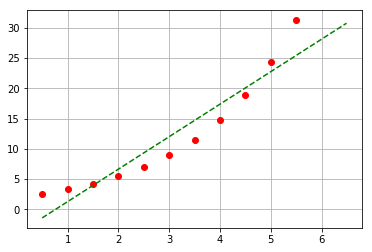


------------ Square approximation ------------
S = 4.36


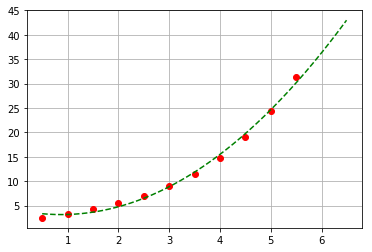


------------ Exponential approximation ------------
S = 2396.29


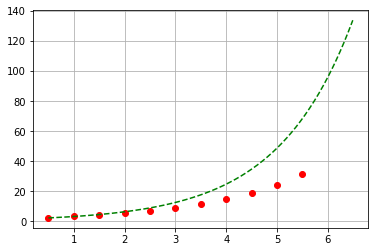


------------ Logarithm approximation ------------
S = 294.81


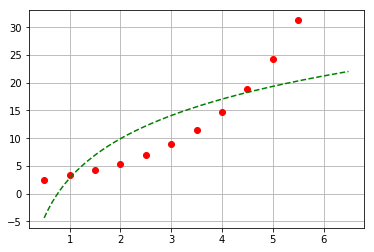


------------ Power approximation ------------
S = 87.25


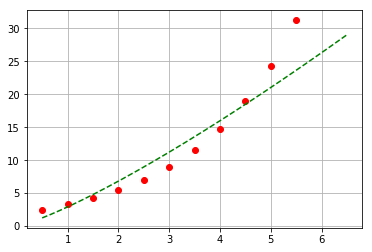

The best approximation is the Square approximation
+-----+-------+--------+--------+----------+-----------+-------+
|  X  |   Y   | Linear | Square | Exponent | Logarithm | Power |
+-----+-------+--------+--------+----------+-----------+-------+
| 0.5 |  2.46 | -1.41  |  3.32  |   2.32   |   -4.37   |  1.24 |
| 1.0 |  3.29 |  1.27  |  3.16  |   3.26   |    2.77   |  2.91 |
| 1.5 |  4.23 |  3.96  |  3.64  |   4.57   |    6.94   |  4.79 |
| 2.0 |  5.43 |  6.64  |  4.75  |   6.41   |    9.9    |  6.82 |
| 2.5 |  6.98 |  9.33  |  6.49  |   8.99   |    12.2   |  8.97 |
| 3.0 |  8.96 | 12.01  |  8.86  |  12.61   |   14.08   | 11.23 |
| 3.5 | 11.51 |  14.7  | 11.86  |  17.69   |   15.67   | 13.57 |
| 4.0 | 14.78 | 17.38  | 15.49  |  24.81   |   17.04   | 15.99 |
| 4.5 | 18.95 | 20.07  | 19.75  |  34.81   |   18.25   | 18.49 |
| 5.0 | 24.31 | 22.76  | 24.65  |  48.82   |   19.34   | 21.04 |
| 5.5 | 31.25 | 25.44  | 30.18  |  68.49   |   20.32   | 23.66 |
|  -- |   S   | 89.83  |  4.36  | 2396.

In [28]:
with open("points") as f:
    try:
        x_arr = [float(x) for x in f.readline().split()]
        y_arr = [float(y) for y in f.readline().split()]
        if len(x_arr) != len(y_arr):
            raise Exception("Строки должны содержать одинаковое количество чисел")
    except ValueError as e:
        print("Ошибка во входных данных, ожидаются 2 строки с числами, которые разделены пробелами")
        print(repr(e))
        sys.exit(1)
    except Exception as e:
        print(repr(e))
        sys.exit(1)

approx_linear = Approximation(x_arr, y_arr, "Linear approximation", linear_approx, linear)
approx_square = Approximation(x_arr, y_arr, "Square approximation", square_approximation, 
                                 polynomial_second_degree)
approx_exponent = Approximation(x_arr, y_arr, "Exponential approximation", exponent_approximation, exponent)
approx_log = Approximation(x_arr, y_arr, "Logarithm approximation", logarithmic_approximation, ln)
approx_power = Approximation(x_arr, y_arr, "Power approximation", power_approximation, power)

approx_list = []
approx_list.append(approx_linear)
approx_list.append(approx_square)
approx_list.append(approx_exponent)
approx_list.append(approx_log)
approx_list.append(approx_power)

the_best_approx: Approximation = None
for appr in approx_list:
    if the_best_approx == None or the_best_approx.S > appr.S:
        the_best_approx = appr

plot_x = np.array(np.arange(x_arr[0], x_arr[len(x_arr) - 1] + 1, step = 0.01))

def print_approx(approx: Approximation):
    print(f"\n------------ {approx.name} ------------")
    print(f"S = {round(approx.S, 2)}")
    plt.plot(approx.x_vals, approx.y_vals, 'ro', plot_x, [approx.calc_f(x, approx.a, approx.b, approx.c) for x in plot_x], 'g--')
    plt.grid()
    plt.show()

for appr in approx_list:
    print_approx(appr)

print(f"The best approximation is the {the_best_approx.name}")

table = PrettyTable()
table.field_names = ["X", "Y", "Linear", "Square", "Exponent", "Logarithm", "Power"]
for i in range(len(the_best_approx.x_vals)):
    table.add_row([the_best_approx.x_vals[i], the_best_approx.y_vals[i], round(approx_linear.f_vars[i], 2), 
                   round(approx_square.f_vars[i], 2), round(approx_exponent.f_vars[i], 2), 
                   round(approx_log.f_vars[i], 2), round(approx_power.f_vars[i], 2)])
table.add_row(['--', 'S'] + [round(appr.S, 2) for appr in approx_list])
table.add_row(['--', 'δ'] + [round(appr.sqr_deviation, 2) for appr in approx_list])
table.add_row(['--', 'a'] + [round(appr.a, 2) for appr in approx_list])
table.add_row(['--', 'b'] + [round(appr.b, 2) for appr in approx_list])
table.add_row(['--', 'c', '--', round(approx_square.c, 2), '--', '--', '--'])
print(str(table))